## Logistic regression
### Visualizing data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft
from scipy import signal
import tkinter as tk
from tkinter import filedialog
import pathlib
from pathlib import Path
import os
import time
import librosa
import IPython.display as ipd
from librosa import display
import pandas as pd

In [2]:
cwd = Path.cwd()
file_path = Path(cwd).joinpath(r'Unit4', 'input_dataset-2.parquet')
print(file_path)

C:\Users\100cgj\OneDrive - Sysco AS\Dokumenter\Hackaton\krafthack2022onsite\Unit4\input_dataset-2.parquet


In [3]:
tic = time.time()
df = pd.read_parquet(file_path)
toc = time.time()
print("Load Time:",toc-tic)


Load Time: 0.9790506362915039


In [4]:
dfColumns = df.columns
data = []
for x in dfColumns:
    data.append(df[x])
time = np.linspace(0,df.shape[0],df.shape[0])

## Unfixed Data

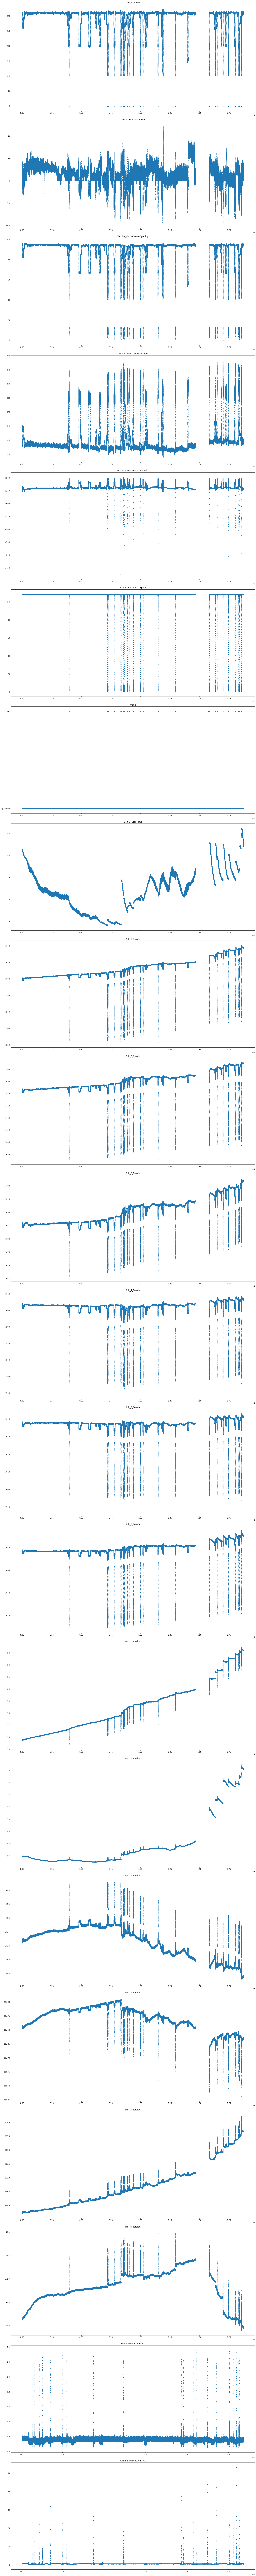

In [5]:
fig, axs = plt.subplots(len(data), figsize = (20, 200))
axs = axs.flatten()
for i in range(0,len(axs)):
    axs[i].scatter(time,data[i], marker = ".")
    axs[i].set_title(dfColumns[i])
fig.tight_layout()
plt.show()

## Fix the data and save to a new files with fixed data

Delete the data where there is no value

create a dataframe for each bolt tension and torsion

In [6]:
dfColumns

Index(['Unit_4_Power', 'Unit_4_Reactive Power', 'Turbine_Guide Vane Opening',
       'Turbine_Pressure Drafttube', 'Turbine_Pressure Spiral Casing',
       'Turbine_Rotational Speed', 'mode', 'Bolt_1_Steel tmp',
       'Bolt_1_Tensile', 'Bolt_2_Tensile', 'Bolt_3_Tensile', 'Bolt_4_Tensile',
       'Bolt_5_Tensile', 'Bolt_6_Tensile', 'Bolt_1_Torsion', 'Bolt_2_Torsion',
       'Bolt_3_Torsion', 'Bolt_4_Torsion', 'Bolt_5_Torsion', 'Bolt_6_Torsion',
       'lower_bearing_vib_vrt', 'turbine_bearing_vib_vrt'],
      dtype='object')

In [7]:
bolt1Columns = list(dfColumns[2:7])
bolt1Columns.append(dfColumns[0])
bolt1Columns.append(dfColumns[-1])
bolt1Columns.append(dfColumns[-2])
bolt1Columns.append(dfColumns[8])
bolt1Columns.append(dfColumns[14])
print(bolt1Columns)

['Turbine_Guide Vane Opening', 'Turbine_Pressure Drafttube', 'Turbine_Pressure Spiral Casing', 'Turbine_Rotational Speed', 'mode', 'Unit_4_Power', 'turbine_bearing_vib_vrt', 'lower_bearing_vib_vrt', 'Bolt_1_Tensile', 'Bolt_1_Torsion']


In [8]:
bolt1Df =  df[bolt1Columns].copy()

In [9]:
bolt1Df.head()

Turbine_Guide Vane Opening  Turbine_Pressure Drafttube  \
timepoints                                                                    
1970-12-19 09:51:44                   82.279976                  173.955216   
1970-12-19 09:51:45                   82.277248                  173.989815   
1970-12-19 09:51:46                   82.274520                  174.024413   
1970-12-19 09:51:47                   82.271792                  174.059012   
1970-12-19 09:51:48                   82.269064                  174.153819   

                     Turbine_Pressure Spiral Casing  Turbine_Rotational Speed  \
timepoints                                                                      
1970-12-19 09:51:44                     5310.799181                107.964278   
1970-12-19 09:51:45                     5311.219755                107.964273   
1970-12-19 09:51:46                     5311.640329                107.964269   
1970-12-19 09:51:47                     5312.060902                107.964264   
1970-12-19 09:51:48                     5312.405938                107.964259   

                          mode  Unit_4_Power  turbine_bearing_vib_vrt  \
timepoints                                                              
1970-12-19 09:51:44  operation    262.204308                      NaN   
1970-12-19 09:51:45  operation    262.104319                      NaN   
1970-12-19 09:51:46  operation    262.004330                      NaN   
1970-12-19 09:51:47  operation    261.904340                      NaN   
1970-12-19 09:51:48  operation    261.804351                      NaN   

                     lower_bearing_vib_vrt  Bolt_1_Tensile  Bolt_1_Torsion  
timepoints                                                                  
1970-12-19 09:51:44                    NaN     1598.481390      175.758460  
1970-12-19 09:51:45                    NaN     1598.477449      175.755164  
1970-12-19 09:51:46                    NaN     1598.479316      175.764601  
1970-12-19 09:51:47                    NaN     1598.490184      175.763157  
1970-12-19 09:51:48                    NaN     1598.494073      175.760959

In [10]:
bolt1Df = bolt1Df.dropna(subset=['Bolt_1_Torsion', 'Bolt_1_Tensile'])

In [11]:
dataBolt1 = []
for x in bolt1Columns:
    dataBolt1.append(bolt1Df[x])
time = np.linspace(0,bolt1Df.shape[0],bolt1Df.shape[0])

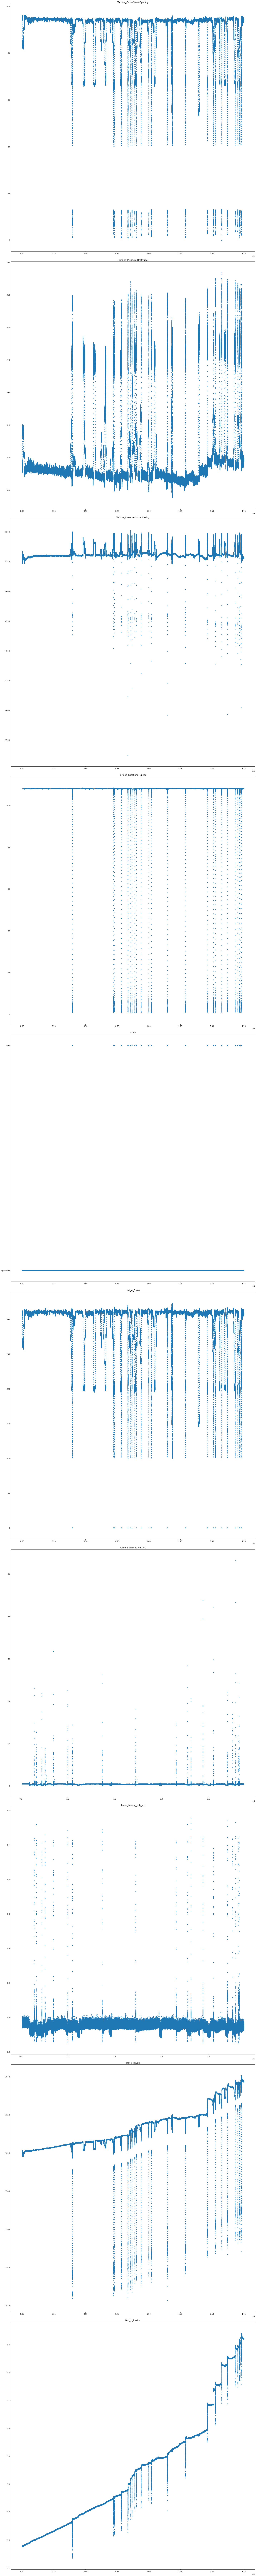

In [12]:
fig, axs = plt.subplots(len(dataBolt1), figsize = (20, 200))
axs = axs.flatten()
for i in range(0,len(axs)):
    axs[i].scatter(time,dataBolt1[i], marker = ".")
    axs[i].set_title(bolt1Columns[i])
fig.tight_layout()
plt.show()

## Divide data to oppstart and operation

In [13]:
Bolt1Operationdf = bolt1Df.drop(bolt1Df[bolt1Df['mode'] == 'start'].index)
Bolt1Operationdf = Bolt1Operationdf.drop(columns = ['mode'],axis=1)


In [14]:
Bolt1Startdf = bolt1Df.drop(bolt1Df[bolt1Df['mode'] == 'operation'].index)
Bolt1Startdf = Bolt1Startdf.drop(columns = ['mode'],axis=1)

In [15]:
bolt1Columns.remove('mode')
dataBolt1Operation = []
for x in bolt1Columns:
    dataBolt1Operation.append(Bolt1Operationdf[x])
time = np.linspace(0,Bolt1Operationdf.shape[0],Bolt1Operationdf.shape[0])

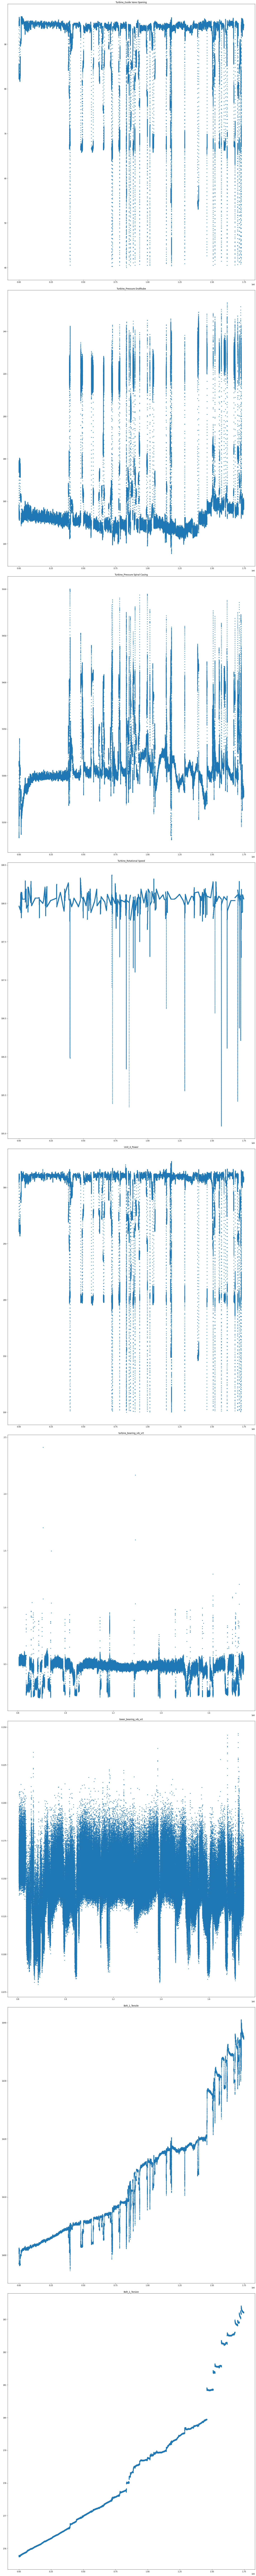

In [16]:
fig, axs = plt.subplots(len(dataBolt1Operation), figsize = (20, 200))
axs = axs.flatten()
for i in range(0,len(axs)):
    axs[i].scatter(time, dataBolt1Operation[i], marker = ".")
    axs[i].set_title(bolt1Columns[i])
fig.tight_layout()
plt.show()

In [ ]:
Bolt1Operationdf.to_csv('Unit4/bol1Dataset2Operation.csv', index=False)
Bolt1Startdf.to_csv('Unit4/bol1Dataset2Start.csv', index=False)